# Customer Segmentation using RFM Analysis & Clustering

## Problem Statement
### The core objective of this project is to identify different segments of customers based on their purchasing behavior using RFM (Recency, Frequency, Monetary) analysis. This segmentation will help understand the value each customer brings and allow for better targeting strategies for sales and marketing.

## Dataset Details

### Tables used:

### [Sales].[OrderItem]

### [Sales].[Order]

### [Production].[Product]

In [ ]:
# Suppress Warnings
import warnings 
from warnings import filterwarnings
filterwarnings("ignore")

In [ ]:
server = 'DESKTOP-T93UL8P\SQLEXPRESS'  # Use 'localhost', '.' or '127.0.0.1' for a local instance
database = 'BikeStores'  
driver = 'ODBC Driver 17 for SQL Server' 

In [4]:
conn_str = f'DRIVER={driver};SERVER={server};DATABASE={database};Trusted_Connection=yes;'

In [ ]:
# Fetch Order Item Table
conn = pyodbc.connect(conn_str)
print("Connection successful!")

query = "SELECT * FROM [Sales].[OrderItem] "  
sales_order_item = pd.read_sql(query, conn)
print(sales_order_item);


Connection successful!
        OrderID  ItemID  ProductID  Quantity  ListPrice  Discount   LineTotal
0             1       1         38         3     549.99      0.05   1567.4715
1             2       1        101         3     339.99      0.07    948.5721
2             2       2          5         3    1320.99      0.07   3685.5621
3             2       3         37         1     379.99      0.07    353.3907
4             3       1         14         3     269.99      0.07    753.2721
...         ...     ...        ...       ...        ...       ...         ...
368683   126191       1         28         5    2499.99      0.05  11874.9525
368684   126191       2        104         5     481.99      0.05   2289.4525
368685   126192       1         27         5     999.99      0.07   4649.9535
368686   126192       2         20         4     599.99      0.05   2279.9620
368687   126192       3         70         4     659.99      0.05   2507.9620

[368688 rows x 7 columns]


In [6]:
sales_order_item.head()

,OrderID,ItemID,ProductID,Quantity,ListPrice,Discount,LineTotal
0,1,1,38,3,549.99,0.05,1567.4715
1,2,1,101,3,339.99,0.07,948.5721
2,2,2,5,3,1320.99,0.07,3685.5621
3,2,3,37,1,379.99,0.07,353.3907
4,3,1,14,3,269.99,0.07,753.2721


In [ ]:
# Fetch Order Table
query = "SELECT * FROM [Sales].[Order]" 

sales_order = pd.read_sql(query, conn)

In [8]:
sales_order

,OrderID,CustomerID,Status,OrderDate,RequiredDate,ShippedDate,StoreID,EmployeeID,OrderTotal
0,1,68,4,2009-01-01,2009-01-02,2009-01-03,3,8,1567.47
1,2,68,4,2009-01-01,2009-01-02,2009-01-03,3,8,4987.52
2,3,68,4,2009-01-01,2009-01-02,2009-01-03,3,8,3553.26
3,4,68,4,2009-01-01,2009-01-02,2009-01-03,3,8,10318.45
4,5,68,4,2009-01-01,2009-01-02,2009-01-03,3,8,13456.70
...,...,...,...,...,...,...,...,...,...
126187,126188,604,4,2019-12-27,2019-12-30,2019-12-30,2,6,3351.93
126188,126189,244,4,2019-12-28,2019-12-30,2019-12-29,1,3,3733.09
126189,126190,217,4,2019-12-30,2019-12-31,2019-12-31,1,3,10757.58
126190,126191,39,4,2019-12-31,2019-01-03,2019-01-02,2,7,14164.41


In [ ]:
# Fetch Product Table
query = "SELECT * FROM [Production].[Product]"  

Product_list = pd.read_sql(query, conn)

In [13]:
Product_list

,ProductID,Name,BrandID,CategoryID,ModelYear,ListPrice
0,1,Trek 820 - 2005,9,6,2005,379.99
1,2,Ritchey Timberwolf Frameset - 2005,5,6,2005,749.99
2,3,Surly Wednesday Frameset - 2005,8,6,2005,999.99
3,4,Trek Fuel EX 8 29 - 2005,9,6,2005,2899.99
4,5,Heller Shagamaw Frame - 2005,3,6,2005,1320.99
...,...,...,...,...,...,...
316,317,Trek Checkpoint ALR 5 - 2008,9,7,2008,1999.99
317,318,Trek Checkpoint ALR 5 Women's - 2008,9,7,2008,1999.99
318,319,Trek Checkpoint SL 5 Women's - 2008,9,7,2008,2799.99
319,320,Trek Checkpoint SL 6 - 2008,9,7,2008,3799.99


## Exploratory Data Analysis (EDA)

### Preprocessing:

#### Data types were appropriately cast (e.g., datetime conversion for OrderDate).

#### Merging of tables done on keys (OrderID and ProductID).

#### Created new features like:

#### Product_last_date: Last date a product was ordered

#### Recency: Difference between the current date and the last purchase date

## 

In [ ]:
# Merging of tables done on keys (OrderID and ProductID)
df = pd.merge(sales_order,sales_order_item, on = 'OrderID').merge(Product_list, on = 'ProductID')

In [15]:
df.shape

(368688, 20)

In [13]:
Final_Sales = df.loc[ : , ['OrderID', 'ProductID', 'OrderDate', 'OrderTotal', 'Name']]

In [14]:
Final_Sales = Final_Sales.astype({'OrderID': 'object', 'ProductID' : 'object'})

In [ ]:
# Data types were appropriately cast (e.g., datetime conversion for OrderDate).
Final_Sales['OrderDate'] = pd.to_datetime(Final_Sales['OrderDate'])

In [16]:
maximum_date = Final_Sales['OrderDate'].max()

In [17]:
maximum_date

Timestamp('2019-12-31 00:00:00')

In [18]:
Final_Sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 368688 entries, 0 to 368687
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   OrderID     368688 non-null  object        
 1   ProductID   368688 non-null  object        
 2   OrderDate   368688 non-null  datetime64[ns]
 3   OrderTotal  368688 non-null  float64       
 4   Name        368688 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 14.1+ MB


In [19]:
Final_Sales.groupby('Name')['OrderTotal'].sum()

Name
Electra Amsterdam Fashion 3i Ladies' - 2006/2007      590243.44
Electra Amsterdam Fashion 7i Ladies' - 2006         24838773.70
Electra Amsterdam Original 3i - 2004/2006           16601600.72
Electra Amsterdam Original 3i Ladies' - 2006        20235209.55
Electra Amsterdam Royal 8i - 2006/2007                 52159.86
                                                       ...     
Trek X-Caliber 8 - 2006                             21611311.22
Trek X-Caliber 8 - 2007                               187915.49
Trek X-Caliber Frameset - 2007                        724077.35
Trek XM700+ - 2007                                   1929363.03
Trek XM700+ Lowstep - 2007                           1638959.20
Name: OrderTotal, Length: 278, dtype: float64

In [20]:
Final_Sales['Product_last_date'] = Final_Sales.groupby('Name')['OrderDate'].transform('max')

In [21]:
Final_Sales['Product_last_date'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 368688 entries, 0 to 368687
Series name: Product_last_date
Non-Null Count   Dtype         
--------------   -----         
368688 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 2.8 MB


In [22]:
Final_Sales['last_date_order'] = maximum_date

In [23]:
Final_Sales['last_date_order'] = Final_Sales['last_date_order'].astype('datetime64[ns]')

In [24]:
Final_Sales['last_date_order'] - Final_Sales['Product_last_date']

0         15 days
1         15 days
2         15 days
3         15 days
4         15 days
           ...   
368683   637 days
368684   637 days
368685   637 days
368686   637 days
368687   637 days
Length: 368688, dtype: timedelta64[ns]

In [25]:
Final_Sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 368688 entries, 0 to 368687
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   OrderID            368688 non-null  object        
 1   ProductID          368688 non-null  object        
 2   OrderDate          368688 non-null  datetime64[ns]
 3   OrderTotal         368688 non-null  float64       
 4   Name               368688 non-null  object        
 5   Product_last_date  368688 non-null  datetime64[ns]
 6   last_date_order    368688 non-null  datetime64[ns]
dtypes: datetime64[ns](3), float64(1), object(3)
memory usage: 19.7+ MB


### RFM Calculation:

### Recency: Days since last purchase

### Frequency: Number of orders per product

### Monetary Value: Sum of order totals

In [ ]:
# Recency 
Final_Sales['Recency'] = Final_Sales['last_date_order'] - Final_Sales['Product_last_date']

In [27]:
aggregated  = Final_Sales.groupby('Name').agg(Frequency = ('Name', 'count'), Monetory_Value = ('OrderTotal', 'sum'))

In [28]:
recency = Final_Sales.groupby('Name').apply(
    lambda group: (group['last_date_order'].max() - group['Product_last_date'].max()).days
).rename('Recency')

In [29]:
RFM_data = pd.concat([recency, aggregated], axis = 1)

In [30]:
RFM_data = RFM_data.reset_index()
RFM_data

,Name,Recency,Frequency,Monetory_Value
0,Electra Amsterdam Fashion 3i Ladies' - 2006/2007,610,96,590243.44
1,Electra Amsterdam Fashion 7i Ladies' - 2006,11,2176,24838773.70
2,Electra Amsterdam Original 3i - 2004/2006,0,1984,16601600.72
3,Electra Amsterdam Original 3i Ladies' - 2006,4,1952,20235209.55
4,Electra Amsterdam Royal 8i - 2006/2007,650,32,52159.86
...,...,...,...,...
273,Trek X-Caliber 8 - 2006,37,2048,21611311.22
274,Trek X-Caliber 8 - 2007,620,64,187915.49
275,Trek X-Caliber Frameset - 2007,628,96,724077.35
276,Trek XM700+ - 2007,623,160,1929363.03


In [32]:
RFM_data

,Name,Recency,Frequency,Monetory_Value
0,Electra Amsterdam Fashion 3i Ladies' - 2006/2007,610,96,590243.44
1,Electra Amsterdam Fashion 7i Ladies' - 2006,11,2176,24838773.70
2,Electra Amsterdam Original 3i - 2004/2006,0,1984,16601600.72
3,Electra Amsterdam Original 3i Ladies' - 2006,4,1952,20235209.55
4,Electra Amsterdam Royal 8i - 2006/2007,650,32,52159.86
...,...,...,...,...
273,Trek X-Caliber 8 - 2006,37,2048,21611311.22
274,Trek X-Caliber 8 - 2007,620,64,187915.49
275,Trek X-Caliber Frameset - 2007,628,96,724077.35
276,Trek XM700+ - 2007,623,160,1929363.03


## Relationship between R,F and M

In [34]:
# Exploring the data, check relationship between R,F and M
def relationship(df, col1, col2):
    sns.lmplot(df, x = col1, y = col2)


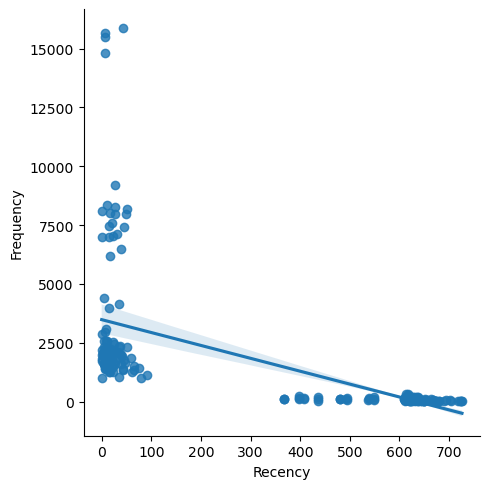

In [35]:
relationship(RFM_data, 'Recency', 'Frequency')

There is a noticeable negative correlation between recency and frequency. As recency increases (longer time since last purchase), frequency decreases.

This suggests that customers who purchase frequently tend to make purchases more recently.

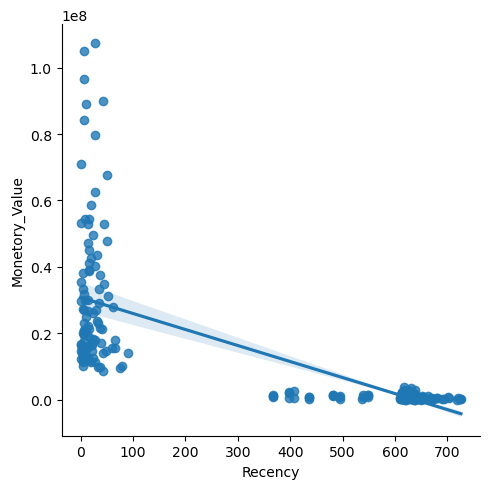

In [36]:
relationship(RFM_data, 'Recency', 'Monetory_Value');

same as above 

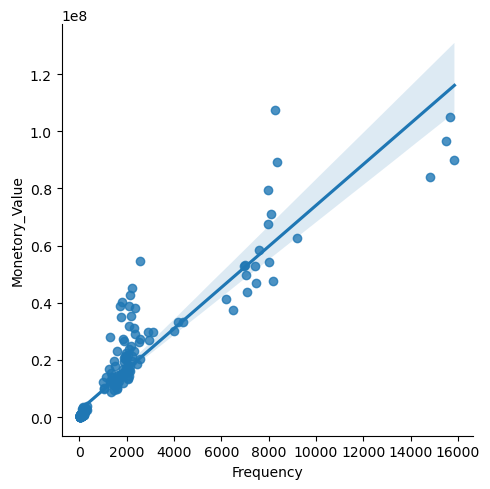

In [37]:
relationship(RFM_data, 'Frequency', 'Monetory_Value');

There is a strong positive correlation between frequency and monetary value. As frequency increases, monetary value also increases.

This indicates that customers who make purchases more frequently tend to spend more overall.

## Check for Outliers

In [38]:
def Outlier_detect (df,col):
    fig , (ax1 , ax2 ) = plt.subplots(2,1)
    
    sns.boxplot(x = df[col], ax=ax1)
    sns.histplot(x = df[col], ax=ax2 , kde = True)

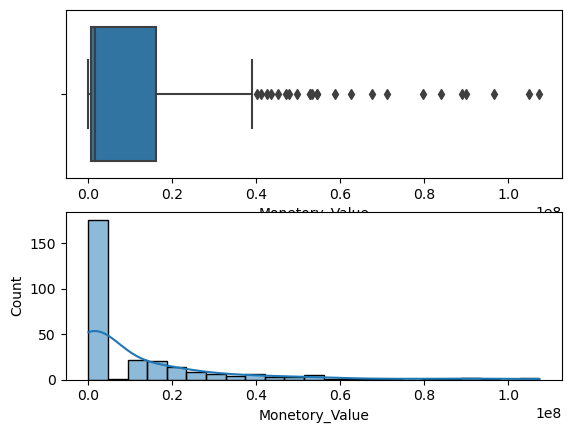

In [39]:
# Monetory Value
Outlier_detect(RFM_data, 'Monetory_Value')

## Key Insights:
1. Right Skewness: The data is heavily right-skewed, indicating that most customers spend relatively little, but a small number of customers     spend significantly more.

2. Outliers: A large number of outliers suggest the presence of high-value customers (Actual values)

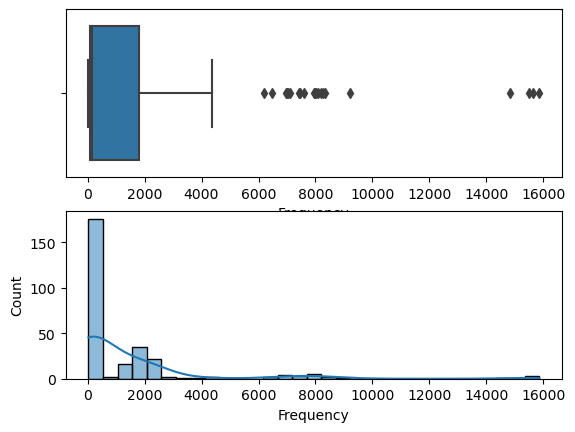

In [40]:
# Frequency
Outlier_detect(RFM_data, 'Frequency')

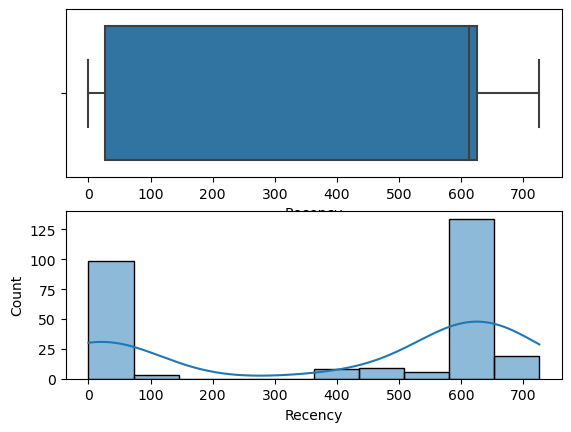

In [41]:
# Recency
Outlier_detect(RFM_data, 'Recency')

## Clustering Analysis 

### Data Scaling 

In [49]:
X = RFM_data.drop('Name', axis = 1)

In [50]:
X

,Recency,Frequency,Monetory_Value
0,610,96,590243.44
1,11,2176,24838773.70
2,0,1984,16601600.72
3,4,1952,20235209.55
4,650,32,52159.86
...,...,...,...
273,37,2048,21611311.22
274,620,64,187915.49
275,628,96,724077.35
276,623,160,1929363.03


In [51]:
from sklearn.preprocessing import StandardScaler

In [52]:
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

In [53]:
scaled_X

array([[ 7.47313511e-01, -4.82781707e-01, -5.73104827e-01],
       [-1.32717039e+00,  3.33486405e-01,  6.65970185e-01],
       [-1.36526609e+00,  2.58138579e-01,  2.45059099e-01],
       [-1.35141311e+00,  2.45580608e-01,  4.30732781e-01],
       [ 8.85843321e-01, -5.07897649e-01, -6.00600345e-01],
       [ 8.13115171e-01, -4.95339678e-01, -5.58203950e-01],
       [-1.21634655e+00,  5.70201899e+00,  3.99775301e+00],
       [ 1.31055180e-02, -4.70223736e-01, -5.67734363e-01],
       [ 7.50776756e-01, -4.70223736e-01, -5.26933735e-01],
       [ 9.65497962e-01, -5.07897649e-01, -5.83356364e-01],
       [ 8.23504906e-01, -4.45107795e-01, -5.39322409e-01],
       [ 8.40821133e-01, -5.07897649e-01, -6.00329884e-01],
       [ 7.81945963e-01, -4.95339678e-01, -5.87159088e-01],
       [ 3.49040307e-01, -4.95339678e-01, -5.89393757e-01],
       [ 8.09651925e-01, -4.82781707e-01, -5.69121971e-01],
       [-1.29253794e+00,  1.95348725e-01,  1.42710650e-01],
       [ 8.33894642e-01, -4.45107795e-01

### Clustering Method: KMeans clustering

In [106]:
from sklearn.cluster import KMeans

In [107]:
ssd = []

for k in range(2,30):
    
    model = KMeans(n_clusters=k)
    
    
    model.fit(scaled_X)
    
    #Sum of squared distances of samples to their closest cluster center.
    ssd.append(model.inertia_)

Text(0, 0.5, ' Sum of Squared Distances')

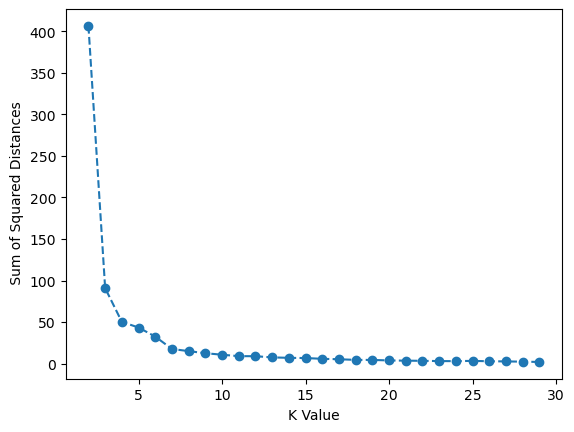

In [108]:
plt.plot(range(2,30),ssd,'o--')
plt.xlabel("K Value")
plt.ylabel(" Sum of Squared Distances")

<Axes: >

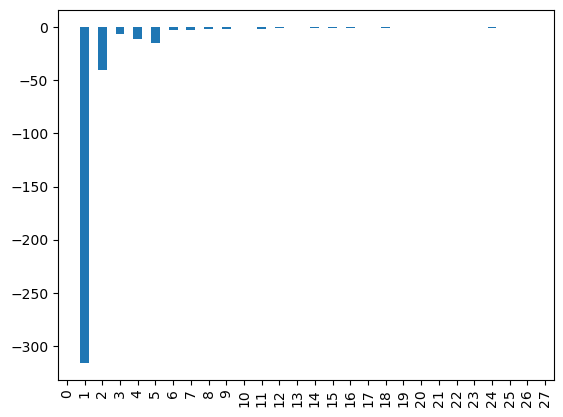

In [109]:
pd.Series(ssd).diff().plot(kind='bar')

The analysis clearly indicates that three clusters are sufficient, as the Sum of Squared Distances (SSD) shows a significant reduction up to three clusters, with minimal improvement beyond this point.

In [151]:
model = KMeans(n_clusters=3)
model.fit(scaled_X)

KMeans(n_clusters=3)

In [147]:
model.labels_

array([1, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 2, 3, 0, 0, 1, 1, 1, 1, 3, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 3, 0, 2, 1, 3, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 1, 3, 3, 3, 3, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 3, 0, 0, 1, 0, 1, 1, 0, 3, 1, 3, 1, 0, 1, 0, 3, 0, 1,
       1, 1, 0, 1, 0, 0, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 3, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 0, 1, 0, 0, 0, 3, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1])

In [154]:
X['K=3 Clusters'] = model.labels_

### Quality of clustering methods.

In [148]:
from sklearn.metrics import silhouette_score

In [152]:
kmeans_silhouette = silhouette_score(scaled_X, model.labels_)
print(f"Silhouette Score for K-Means: {kmeans_silhouette:.2f}")

Silhouette Score for K-Means: 0.82


Silhouette Score for K-Means: 0.82

In [155]:
X['K=3 Clusters'].value_counts()

K=3 Clusters
0    176
1     81
2     21
Name: count, dtype: int64

In [159]:
X

,Recency,Frequency,Monetory_Value,K=3 Clusters
0,610,96,590243.44,0
1,11,2176,24838773.70,1
2,0,1984,16601600.72,1
3,4,1952,20235209.55,1
4,650,32,52159.86,0
...,...,...,...,...
273,37,2048,21611311.22,1
274,620,64,187915.49,0
275,628,96,724077.35,0
276,623,160,1929363.03,0


### Features to influence Clustering 

<Axes: >

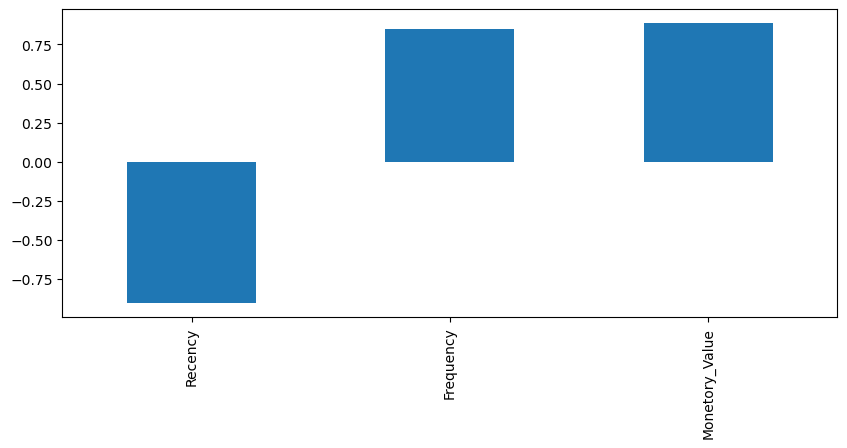

In [118]:
plt.figure(figsize=(10,4))
X.corr()['K=3 Clusters'].iloc[:-1].sort_values().plot(kind='bar')

In [141]:
X.corr()['K=3 Clusters'].sort_values()

Recency          -0.811051
Frequency         0.849152
Monetory_Value    0.868787
K=3 Clusters      1.000000
Name: K=3 Clusters, dtype: float64

In clustering analysis, recency plays a highest weightage, while frequency and monetary value hold nearly equal weightage.

<Axes: xlabel='Recency', ylabel='Monetory_Value'>

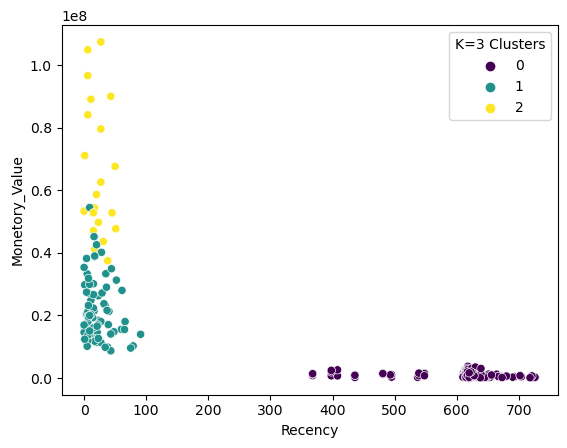

In [156]:
sns.scatterplot(data=X, x='Recency', y='Monetory_Value', hue='K=3 Clusters', palette='viridis')


<Axes: xlabel='Frequency', ylabel='Monetory_Value'>

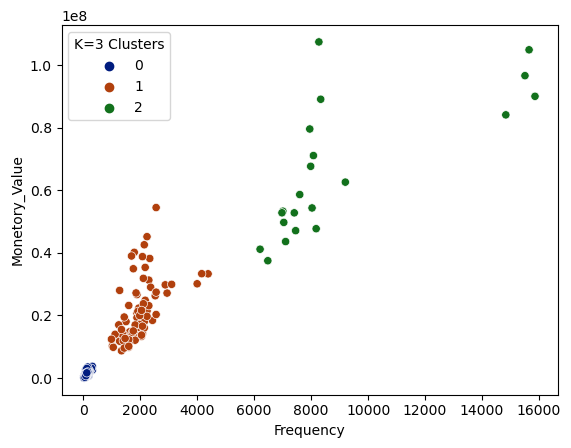

In [127]:
sns.scatterplot(data=X, x='Frequency', y='Monetory_Value', hue='K=3 Clusters', palette='dark')


## Apply DBSCAN Clustering

In [60]:
scaled_df = pd.DataFrame(scaled_X, columns=['Recency', 'Frequency', 'Monetory_Value'])

In [68]:
scaled_df.head()

,Recency,Frequency,Monetory_Value
0,0.747314,-0.482782,-0.573105
1,-1.327170,0.333486,0.665970
2,-1.365266,0.258139,0.245059
3,-1.351413,0.245581,0.430733
4,0.885843,-0.507898,-0.600600


In [69]:
from sklearn.cluster import DBSCAN

In [70]:
outlier_percent = []

for eps in np.linspace(0.001,3,50):
    
    # Create Model
    dbscan = DBSCAN(eps=eps,min_samples=2*scaled_X.shape[1])
    dbscan.fit(scaled_X)
   
     
    # Log percentage of points that are outliers
    perc_outliers = 100 * np.sum(dbscan.labels_ == -1) / len(dbscan.labels_)
    
    outlier_percent.append(perc_outliers)

Text(0.5, 0, 'Epsilon Value')

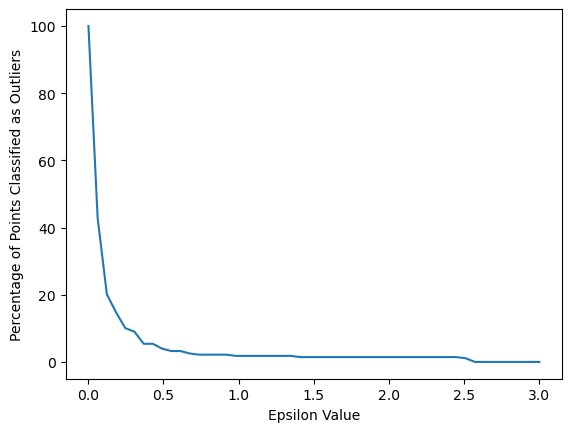

In [73]:
sns.lineplot(x=np.linspace(0.001,3,50),y=outlier_percent)
plt.ylabel("Percentage of Points Classified as Outliers")
plt.xlabel("Epsilon Value")

Reasonable Epsilon value is 0.5

In [130]:
dbscan = DBSCAN(eps=0.5)
dbscan.fit(scaled_X)

DBSCAN()

<Axes: xlabel='Frequency', ylabel='Monetory_Value'>

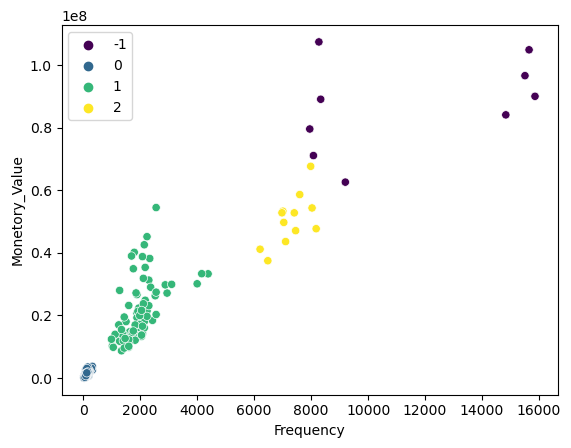

In [98]:
sns.scatterplot(data=X, x='Frequency', y='Monetory_Value', palette='viridis', hue=dbscan.labels_)


<Axes: xlabel='Recency', ylabel='Monetory_Value'>

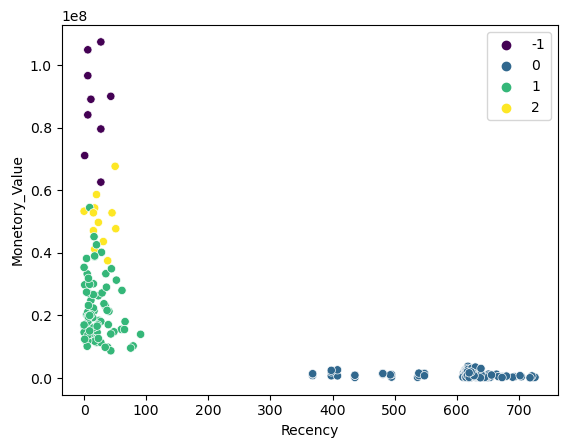

In [97]:
sns.scatterplot(data=X, x='Recency', y='Monetory_Value', hue=dbscan.labels_, palette='viridis')



In [93]:
RFM_data_dbscan = RFM_data.copy()

In [131]:
RFM_data_dbscan['Labels'] = dbscan.labels_

In [101]:
round(RFM_data_dbscan['Labels'].value_counts(normalize=True)*100)

Labels
 0    63.309353
 1    29.136691
 2     4.316547
-1     3.237410
Name: proportion, dtype: float64

In [103]:
label_0 = RFM_data_dbscan['Labels'] == 0
label_1 = RFM_data_dbscan['Labels'] == -1

In [105]:
RFM_data_dbscan.loc[label_0 | label_1]

,Name,Recency,Frequency,Monetory_Value,Labels
0,Electra Amsterdam Fashion 3i Ladies' - 2006/2007,610,96,590243.44,0
4,Electra Amsterdam Royal 8i - 2006/2007,650,32,52159.86,0
5,Electra Amsterdam Royal 8i Ladies - 2007,629,64,881851.58,0
6,Electra Cruiser 1 (24-Inch) - 2005,43,15856,90041312.58,-1
7,Electra Cruiser 1 - 2005/2006/2007,398,128,695342.68,0
...,...,...,...,...,...
272,Trek X-Caliber 7 - 2007,617,96,841102.92,0
274,Trek X-Caliber 8 - 2007,620,64,187915.49,0
275,Trek X-Caliber Frameset - 2007,628,96,724077.35,0
276,Trek XM700+ - 2007,623,160,1929363.03,0


In [132]:
# Silhouette score for DBSCAN
# Note: Silhouette score can only be computed if there are at least 2 clusters.
if len(set(dbscan.labels_)) > 1:
    dbscan_silhouette = silhouette_score(X, dbscan.labels_)
    print(f"Silhouette Score for DBSCAN: {dbscan_silhouette:.2f}")
else:
    print("Silhouette Score for DBSCAN cannot be calculated (only one cluster found).")

Silhouette Score for DBSCAN: 0.73
